# Agregación de vialidades
> En este tutorial vamos a usar el módulo `coberturas` para agregar la red vial de la CDMX en una retícula.

In [ ]:
#|hide
from nbdev.showdoc import show_doc
from nbdev.qmd import div

Importamos los que vamos a necesitar

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
from pyLandUseMX.descargas import *
from pyLandUseMX.coberturas import *

In [ ]:
red = gpd.read_file("datos/descargas/red_zmvm.gpkg")
# zmvm = gpd.read_file("datos/descargas/silhuetas.shp.zip")
# zmvm = zmvm.loc[zmvm.CVE_SUN == '13']
# red = red.sjoin(zmvm.to_crs(red.crs))

In [ ]:
id_acceso_c = [100, 101, 102, 103, 104, 105]
id_primarias = [106, 107]
id_secundarias = 108
id_terciarias = 109
id_residencial = 110


In [ ]:
acceso_controlado = red.loc[red.tag_id.isin(id_acceso_c)]
primarias = red.loc[red.tag_id.isin(id_primarias)]
secundarias = red.loc[red.tag_id == id_secundarias]
terciarias = red.loc[red.tag_id == id_terciarias]
residenciales = red.loc[red.tag_id == id_residencial]

In [ ]:
mapas = {
    "Vialidades de acceso controlado": {
        "datos":acceso_controlado,
        "color": "darkred",
        "peso": 1},
    "Vialidades primarias": {
        "datos":primarias,
        "color": "tomato",
        "peso": 0.8},
    "Vialidades secundaris": {
        "datos":secundarias,
        "color": "chocolate",
        "peso": 0.6},
    "Vialidades terciarias": {
        "datos":terciarias,
        "color": "tan",
        "peso": 0.5},
    "Calles residenciales": {
        "datos":residenciales,
        "color": "black",
        "peso": 0.02},
}

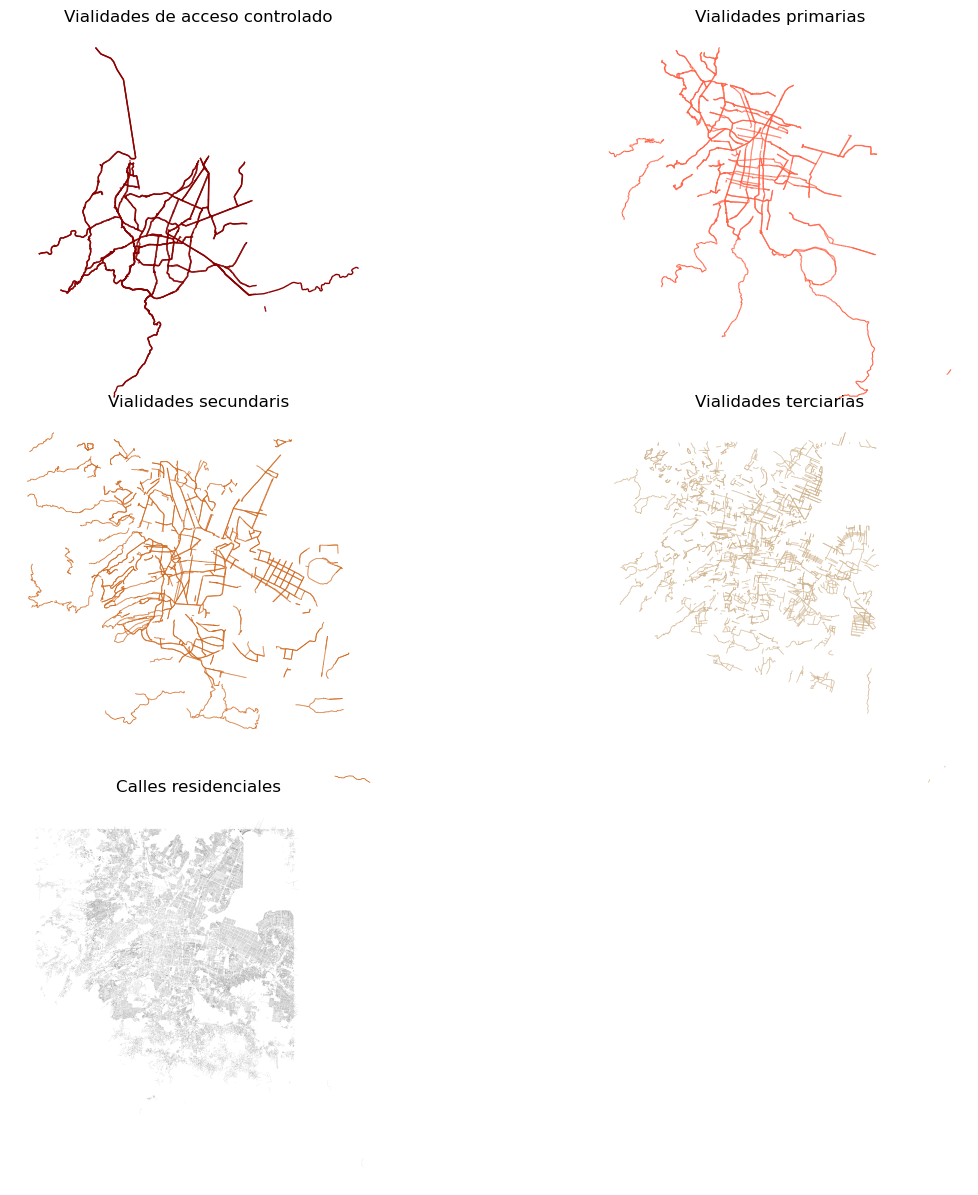

In [ ]:
fig, axs = plt.subplots(3,2,figsize=(15, 15))
axs = axs.ravel()
for i, (k,v) in enumerate(mapas.items()):
    ax = v['datos'].plot(ax=axs[i], linewidth=v['peso'], color=v['color'])
    ax.set_title(k)
    ax.axis('off')

fig.delaxes(axs[-1])
plt.subplots_adjust(wspace=0, hspace=0)
# plt.tight_layout(pad=0.05)

In [ ]:
malla = (Malla
         .desde_capa(red, 1000)
         .agrega_lineas(acceso_controlado, campo='Acceso controlado')
         .agrega_lineas(primarias, campo='Vialidades primarias')
         .agrega_lineas(secundarias, campo='Vialidades secundarias')
         .agrega_lineas(terciarias, campo='Vialidades terciarias')
         .agrega_lineas(residenciales, campo='Calles residenciales'))
 

In [ ]:
malla.malla

,grid_id,geometry,Acceso controlado,Vialidades primarias,Vialidades secundarias,Vialidades terciarias,Calles residenciales
0,0,"POLYGON ((455987.604 2101522.619, 456987.604 2...",0.0,0.0,0.0,0.0,0.0
1,1,"POLYGON ((455987.604 2102522.619, 456987.604 2...",0.0,0.0,0.0,0.0,0.0
2,2,"POLYGON ((455987.604 2103522.619, 456987.604 2...",0.0,0.0,0.0,0.0,0.0
3,3,"POLYGON ((455987.604 2104522.619, 456987.604 2...",0.0,0.0,0.0,0.0,0.0
4,4,"POLYGON ((455987.604 2105522.619, 456987.604 2...",0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
7609,7609,"POLYGON ((535987.604 2190522.619, 536987.604 2...",0.0,0.0,0.0,0.0,0.0
7610,7610,"POLYGON ((535987.604 2191522.619, 536987.604 2...",0.0,0.0,0.0,0.0,0.0
7611,7611,"POLYGON ((535987.604 2192522.619, 536987.604 2...",0.0,0.0,0.0,0.0,0.0
7612,7612,"POLYGON ((535987.604 2193522.619, 536987.604 2...",0.0,0.0,0.0,0.0,0.0


In [ ]:
rasters = malla.to_xarray()

In [ ]:
rasters

<xarray.Dataset>
Dimensions:                 (y: 95, x: 82)
Coordinates:
  * y                       (y) float64 2.102e+06 2.102e+06 ... 2.196e+06
  * x                       (x) float64 5.365e+05 5.355e+05 ... 4.555e+05
    spatial_ref             int64 0
Data variables:
    Acceso controlado       (y, x) float64 nan nan nan nan ... 0.0 0.0 0.0 nan
    Vialidades primarias    (y, x) float64 nan nan nan nan ... 0.0 0.0 0.0 nan
    Vialidades secundarias  (y, x) float64 nan nan nan nan ... 0.0 0.0 0.0 nan
    Vialidades terciarias   (y, x) float64 nan nan nan nan ... 0.0 0.0 0.0 nan
    Calles residenciales    (y, x) float64 nan nan nan nan ... 0.0 0.0 0.0 nan

<matplotlib.collections.QuadMesh>

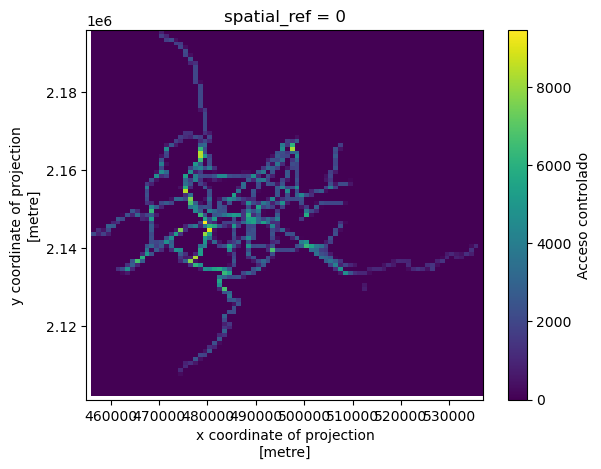

In [ ]:
rasters['Acceso controlado'].plot()


<xarray.plot.facetgrid.FacetGrid>

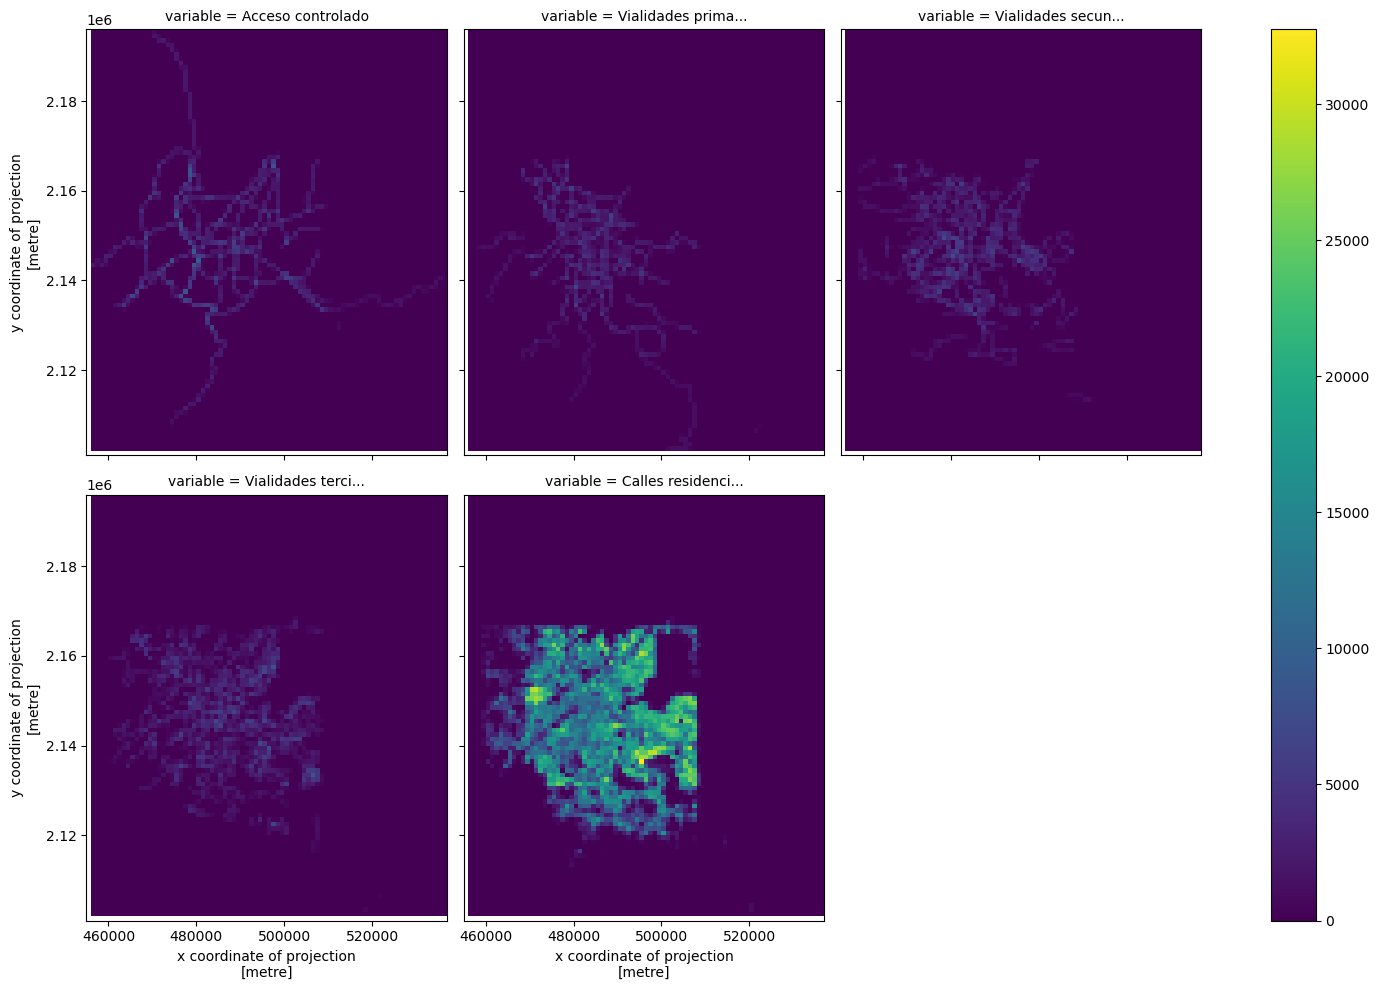

In [ ]:
(rasters
 .to_array()
 .plot(col = 'variable', col_wrap=3, figsize=(15, 10)))